<h1><center>Statistical Regression</center></h1>

<h2><center>Linear, Multivariate, Polynomial and Non-Linear Regression</center></h2>
<h4>About this Notebook</h4>
In this notebook, we will be using scikit-learn for various type of statistical regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value, and measure the accuracy

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#exploring_the_data">Exploring the Data</a></li>
        <li><a href="#linear_regression">Linear regression</a></li>
        <li><a href="#polynomial_regression">Polynomial regression</a></li>
        <li><a href="#nonlinear_regression">Non-linear regression</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<hr>

<h2 id="download_data">Downloading Data</h2>

### Importing Needed packages
Here we will be using pandas dataframes to store the data, with numpy and pylab as useful computational packages to assist in the processing of the data, and Matplotlib for data visualisation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

To download the data, we will take advantage of the jupyter 'magic' command for bash, !wget, to download it from IBM Object Storage.


### Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in and exploring
Using pandas dataframes to store the data, we may use some of the common methods to explore and prepare the dataset in order for us to perform regression analysis. We can better understand the dataset by knowing the data types, distributions, correlations and other information about each feature so that we can pick the most suitable for regression analysis.

In [2]:
data_folder = "C:/Users/Tony/E-Bis Limited/Tony Pikett - TP Documents\Projects/data/"

df = pd.read_csv(data_folder+"FuelConsumption.csv") #pandas method to read in the csv file as a dataframe
df.head() # take a look at the first few rows of the dataset

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

## Data types
Understanding the data types can be beneficial for determining which features are the most useful for the analysis you are performing. For example, in certain clustering algorithms, categorical variables are very good at grouping data points which are similar to one another. For our purposes, regression analysis, we must use numeric, or non-categoric datatypes, as we will be using our model to predict the outcomes of a continuous target variable, based on integer or float inputs of numeric feature variables.

In [3]:
df.dtypes # Determining the data types of a dataset. As we can see, there are multiple numeric features that we can use

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [4]:
df.describe() # Understand some of the key values describing the data distribution of the numeric features.

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

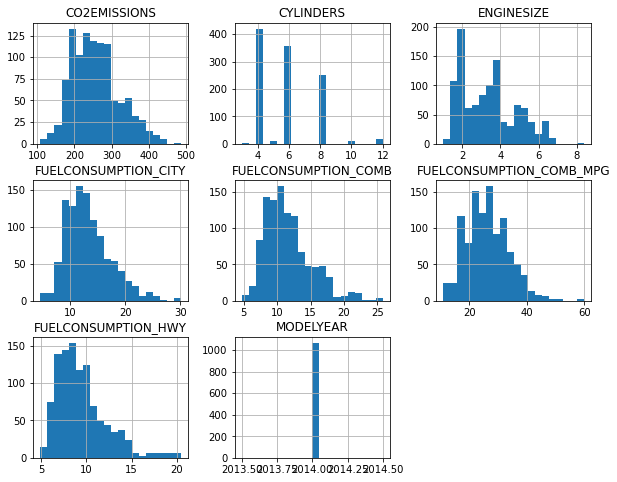

In [5]:
# We may observe this more visually
df.hist(figsize=(10,8), bins =20)
plt.show()

In [6]:
# As all of the entries of 'Model Year' are 2014, this information is not useful to us, and can be dropped from the dataframe
df=df.drop('MODELYEAR' ,axis =1)

As an illustration of the regression process, whereby a respective coefficient is given as a product to each variable as a 'weight' in order to predict the target variable, let us create a dummy variable of randomly distributed data, that we may show that it will be given a calculated coefficient close that is close to zero, as it has little predictive power of the target variable.

In [7]:
dummy = np.random.normal(50, 20, len(df))
df['DUMMY']=dummy
columns_num=[column for column in df.columns if df[column].dtype!=object] # Set of numeric feature columns
cols = list(df.columns.values) 
target=cols.pop(cols.index('CO2EMISSIONS')) 
df = df[[target]+cols]
df.head(3) # As we can show, the dummy variable is now in the table as the last feature variable in the table

CO2EMISSIONS   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0           196  ACURA         ILX      COMPACT         2.0          4   
1           221  ACURA         ILX      COMPACT         2.4          4   
2           136  ACURA  ILX HYBRID      COMPACT         1.5          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG      DUMMY  
0                   8.5                        33  57.463331  
1                   9.6                        29  77.434316  
2                   5.9                        48  34.208339

Let us take a look at how our features relate to the target CO2 Emissions some scatter plots

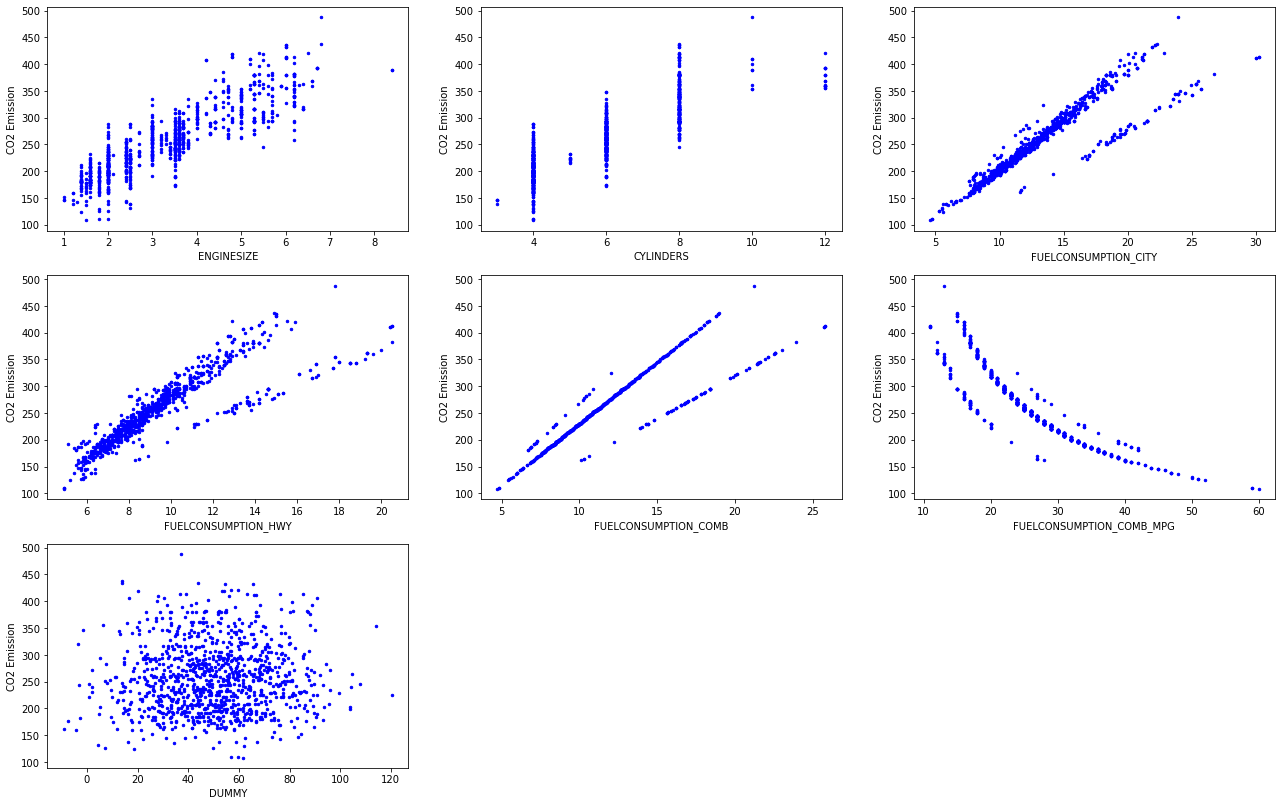

In [8]:
i=0
plt.figure(figsize=(22, 14))
for column in columns_num:
    if column!='CO2EMISSIONS':
        i+=1
        plt.subplot(3, 3, i)
        plt.scatter(df[column], df.CO2EMISSIONS,  color='blue',  marker= 'o', s=6)
        plt.xlabel(column)
        plt.ylabel("CO2 Emission")
plt.show()

# Selecting Features
As we can see, there are some strong correlations between the target variable and the features, with Engine Size, Cylinders, and any of the Fuel Consumption variables being good potential candidates. Let us now determine some of the correlations between the features and the target variable, so that we may best select the most useful features for our model. We will see show the correlation values using the pearson correlation coefficient in the pandas method .corr() and dislay this information using the seaborn visualisation package. 

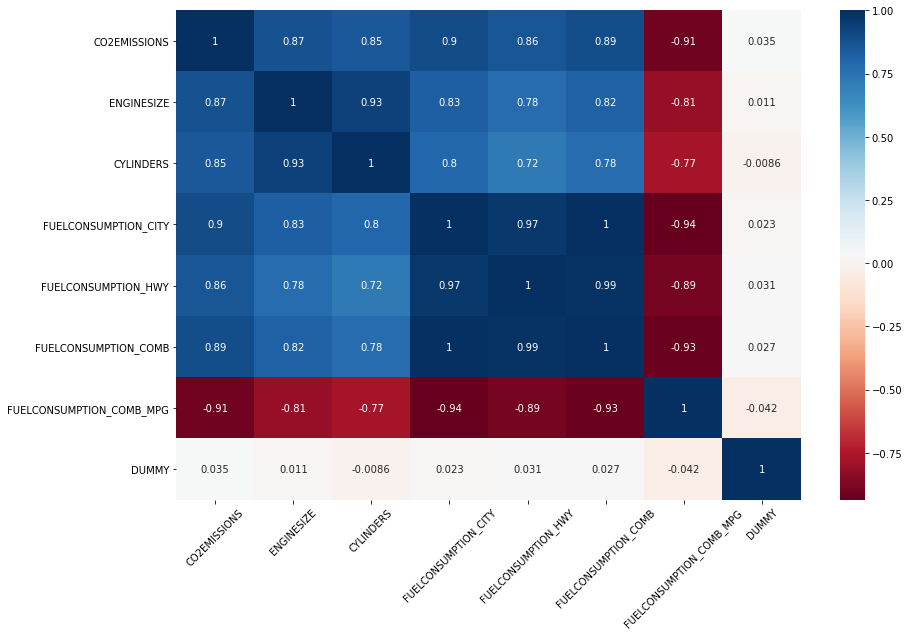

In [9]:
# Display the correlations of the features with respect to each other
#df.corr() tabular form of correlation display
plt.figure(figsize=(14, 9))
chart=sns.heatmap(df.corr(), annot=True, cmap='RdBu')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
plt.show()

From our correlations map and our scatter plots above, we can see some useful trands, with strong correlations and some linear dependancies, as well as one non-linear. Our dummy variable is showing no trends as expected. Now, let us select some features in order to illustrate simple linear regression and multivariable linear regression. We shall select three useful variables, and our dummy variable. Fuel consumption(comb/mpg) has the highest pearson correlation value with respect to the target, as shown above, but the dependancy of the target on this variable is clearly non-linear, and so this will not be a useful variable. Fuel consumption comb has one of the highest correlation values, and has a linear relationship with CO2 Emissions, meaning that it will be the one of the most useful in our prediction model, so we will choose it as our first variable.

<h2 id="correlation_causation"> Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to note that the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<b>Pearson Correlation</b>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y, and is the default method of the pandas function "corr". The resulting coefficient is a value between -1 and 1 inclusive, where there is a strong correlation when the magnitude is close to $1$, with a positive correlation when values are positive and a negative correlation for negative values, and no correlation when it is close to zero:</p>


<b>P-value</b>: 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. The analysis assumes that the correlation of the data is due to random chance, and then returns the probabiliy that this is true. By convention, we say that the evidence that the correlation is significant for values of  $p<0.001$  is strong,  $p<0.05$  is moderate,  $p<0.1$  is weak and  $p>0.001$  is that there no evidence for a statistically significant correlation. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>


In [10]:
from scipy import stats
full_cols=["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG","DUMMY","CO2EMISSIONS"]
ldf=df[full_cols]
feature_cols=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','DUMMY']
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)-1):
        if j>i:
            print('Comparing: ', feature_cols[i] , ' with ', feature_cols[j])
            pearson_coef, p_value = stats.pearsonr(df[feature_cols[i]], df[feature_cols[j]])
            print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
            print()
print()
print()
for i in range(len(feature_cols)):
    print('Comparing: ', feature_cols[i] , ' with ', 'CO2EMISSIONS')
    pearson_coef, p_value = stats.pearsonr(df[feature_cols[i]], df['CO2EMISSIONS'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    print()    

Comparing:  ENGINESIZE  with  CYLINDERS
The Pearson Correlation Coefficient is 0.9340105318978433  with a P-value of P = 0.0

Comparing:  ENGINESIZE  with  FUELCONSUMPTION_HWY
The Pearson Correlation Coefficient is 0.7787457891713876  with a P-value of P = 6.869026796036878e-218

Comparing:  ENGINESIZE  with  FUELCONSUMPTION_COMB
The Pearson Correlation Coefficient is 0.8194821387259767  with a P-value of P = 9.854219732187705e-260

Comparing:  CYLINDERS  with  FUELCONSUMPTION_HWY
The Pearson Correlation Coefficient is 0.7245935500546528  with a P-value of P = 2.236721040461328e-174

Comparing:  CYLINDERS  with  FUELCONSUMPTION_COMB
The Pearson Correlation Coefficient is 0.776787823190975  with a P-value of P = 4.176447127933729e-216

Comparing:  FUELCONSUMPTION_HWY  with  FUELCONSUMPTION_COMB
The Pearson Correlation Coefficient is 0.9858038475936336  with a P-value of P = 0.0



Comparing:  ENGINESIZE  with  CO2EMISSIONS
The Pearson Correlation Coefficient is 0.8741543683958123  with 

### Capturing more information with lower correlated features
For the others, it is best to use variables that do not have a high correlation with respect to one another, this is because two features with a lower mutual correlation, but high correlations with respect to the target variable, will likely be capturing different information that is leading to the strong correlation with them and the target, and so when both are used will lead to better, more informed predictions. However, features with high correlations may well be displaying the same kind of information and relationship with respect to the target, and so are less useful. Consider the obvious example of the Fuel Consumption variables, there is little benefit in using the fuel consumption(combined), which is an average of both city and highway fuel consumption, and the fuel consumption(city) variable, as the information and causal relationships with respect to the target variable for one feature is likely to be very similar to the other.

Considering this, and by having a look at the correlations between the feauteres, we can confidently select Engine Size, Cylinders and Fuel Consumption(comb) as our features, as these have a large correlation with the target variable, while having less correlation with eachother. We will also continue to use our dummy variable.

<h1 id="Linear_regression">Linear regression</h1>

### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. We will form our model based on the training set, after which, the model is then validated on the test set to determine its accuracy. The reason for this is that, when training and validating on one sample of the dataset, there is a risk of 'overfitting' the model, capturing random patterns or 'noise' in the current sample that is not representative of the whole. This occurs because, as a result of sampling and random selection, patterns may appear in the sample which are likely not representative of the causal relationships of the features and the target, and will likely not be present if the training set were taken randomly again, or if more data was added to the whole. In the training stage, the model will take these patterns into account and use them in its predictions. This means that, when a train/test split is taken, the accuracy of the model on the test set is always lower than that of the training set, as the 'noise', or random patterns, that are taken into account in the model will not be present in the test set, leading to slightly lower accuracy. This test accuracy is therefore a more useful metric for understanding how the model will perform in the future on new data, and is the one that is considered as more representative of the model's performance.

We will perform this simple linear regression example on the Engine Size feature. As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line, corerespoding to $b$ and $\theta$ respectively in the form shown below:

$y = b + \theta  x $

Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data, using the Ordinary Least Squares (OLS) method.

In [11]:
from sklearn import linear_model

# Split the linear df into 80% training 20% test
msk = np.random.rand(len(df)) < 0.8
train = ldf[msk]
test = ldf[~msk]

#num_array x and y train and test
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

linregr = linear_model.LinearRegression() #create our linear regression modelling element
linregr.fit (train_x, train_y) # fit linregr element to training data
yhat_lin=linregr.predict(test_x) # our prediction set of CO2 based on linreg model and EngineSize values

# The coefficients
print ('Coefficients: ', linregr.coef_[0])
print ('Intercept: ',linregr.intercept_)

Coefficients:  [38.49102985]
Intercept:  [126.8309404]


#### Plot output
We can plot the fit line over the data to visually assess our model:

Text(0, 0.5, 'Emission')

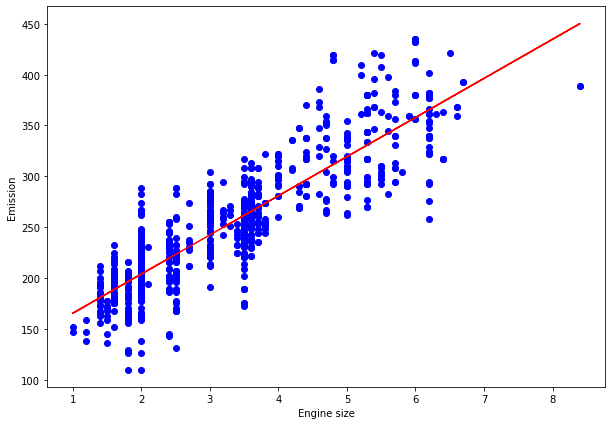

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, linregr.coef_[0][0]*train_x + linregr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="Multivariable_linear_regression">Linear Multivariable regression</h2>

We will now do the same as before but use multiple variables in our model

In [13]:
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','DUMMY']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','DUMMY']])
multi_reg = linear_model.LinearRegression()
multi_reg.fit(train_x, train_y)
yhat_multi=multi_reg.predict(test_x) #test predictions for multivariate model
print('Coefficients: ', multi_reg.coef_)
print('Intercept: ', multi_reg.intercept_)

Coefficients:  [[11.16980688  7.10528263  9.58596499  0.08505301]]
Intercept:  [62.09569319]


As we can see, even though the feature values are roughly of the same order of magnitude, the coefficient attributed to the dummy variable is approximately 2 orders of magnitude less than those of the other features, showing that it is of little predictive use, as there is no relationship between it and the target variable. We will now discard it.

<h2 id="Polynomial_regression">Polynomial regression</h2>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees, we just have to adjust the order of the polynomial feature variable to which ever order we choose.
In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

As fuel_consumption(comb/mpg) displayed a non-linear relationship with the target variable, and also had a strong correlation, therefore we will now include this in our polynomial model instead of Fuel Consumption(comb) to demonstrate Polynomial regression.

In [14]:
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']])



Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly=  poly.fit_transform(test_x)

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

This looks like feature sets for multiple linear regression analysis. Indeed, Polynomial regression is a special case of linear regression, with the simple change of replacing a separate variable with the same variable of order $n$. Therefore, we can apply the same process as before, after we have transformed our data into the polynomial degree which we choose. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$


so we can use __LinearRegression()__ function to solve it:

In [16]:
poly_clf = linear_model.LinearRegression()
train_y_ = poly_clf.fit(train_x_poly, train_y)
yhat_poly=poly_clf.predict(test_x_poly)
# The coefficients
print ('Coefficients: ', poly_clf.coef_)
print ('Intercept: ', poly_clf.intercept_)

Coefficients:  [[ 0.00000000e+00  2.76127834e+01  2.25969257e+01  3.13714664e-01
   4.68993823e+00 -7.53824504e+00 -2.53945988e-01  2.16627711e+00
  -7.21588340e-01 -1.93005270e-02]]
Intercept:  [184.64094048]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. As there are more than 3 dimensions to this dataset, it is rather difficult to represent the polynomial modal visually. Let us made a quick 3rd order polynomial model on fuel_consumption(comb_mpg)

Text(0, 0.5, 'Emission')

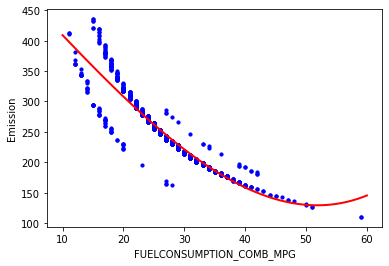

In [17]:
poly_fuel = PolynomialFeatures(degree=3)
train_fuel=train[['FUELCONSUMPTION_COMB_MPG']]
train_fuel_poly = poly_fuel.fit_transform(train_fuel)
poly_reg=linear_model.LinearRegression()
train_x_poly_=  poly_reg.fit(train_fuel_poly, train_y)
coef=train_x_poly_.coef_[0]
inter=train_x_poly_.intercept_[0]
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue', s=10)
x=np.linspace(10.0, 60.0, 1000)
plt.plot(x, inter+ coef[1]*x + coef[2]*np.power(x,2)+coef[3]*np.power(x,3), '-r', linewidth=2)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

Increasing the polynomial to degree 2 seems to better fit the non-linear relationship of the data. However, increasing the degree cannot continue indefinitely, as there is a risk of overfitting the data to the 'random' fluctuations about the general trend of this particular sample. Imagine a sample of the dataset with $n$ datapoints and an $n$th degree polynomial that crosses through many of the datapoints, and so results in a high accuracy. This model is unlikely to do the same for another sample of the dataset, or on future data, where the fluctuations about the general trend of the data will be different to that captured in the model that based on the previous data. Increasing the degree of the polynomial can also be rather expensive, computationally, and the increase in accuracy may not be worth the increased run time, especially on large datasets.

Here is an example of this:

Text(0, 0.5, 'Emission')

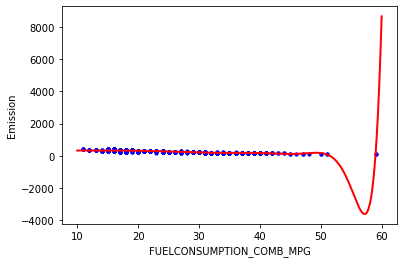

In [18]:
degree = 16
poly_fuel = PolynomialFeatures(degree=degree)
train_fuel=train[['FUELCONSUMPTION_COMB_MPG']]
train_fuel_poly = poly_fuel.fit_transform(train_fuel)
poly_reg=linear_model.LinearRegression()
train_x_poly=  poly_reg.fit(train_fuel_poly, train_y)
coef=train_x_poly.coef_[0]
inter=train_x_poly.intercept_[0]
equ=inter
for n in range(degree):
    equ+=coef[n+1]*np.power(x,n+1)
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue', s=10)
x=np.linspace(10.0, 60.0, 1000)
plt.plot(x, equ , '-r', linewidth=2)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

#### Evaluation
We will now compare the actual values and predicted values of our regression models to calculate their accuracy. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE): ADD INFO ON RMSE
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
   
WRITE PREF SUMMARY ON ERROR METRICS


<h2 id="evaluation">Evaluation</h2>
Let us now apply some of these metrics to our Regression models

In [19]:
from sklearn.metrics import r2_score
model_tab=[['Linear',yhat_lin], ['Multivariable',yhat_multi], ['Polynomial Multivariable',yhat_poly]]
for model in model_tab:
    print(model[0]+' Model:')
    print("Mean absolute error: %.2f" % np.mean(np.absolute(model[1] - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((model[1] - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(model[1], test_y))
    print()

Linear Model:
Mean absolute error: 23.44
Residual sum of squares (MSE): 1015.12
R2-score: 0.65

Multivariable Model:
Mean absolute error: 17.53
Residual sum of squares (MSE): 588.60
R2-score: 0.84

Polynomial Multivariable Model:
Mean absolute error: 13.52
Residual sum of squares (MSE): 438.00
R2-score: 0.88



As we can see, as we added more variables to the model and set the polynomial degree to 2, we acheived more accurate predictions.

## Alternative Metrics
<h3>ANOVA: Analysis of Variance</h3> MOVE AND USE ELSEWHERE
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our CO2 Emissions variable is strongly correlated with the variables we are analyzing, expect ANOVA to return a large (much greater than 1) F-test score and a small p-value. However, we have already seen some ways of determining the correlation, and we will be determining the validity of the models towards the end of this notebook. For now, let us determine those features of the dataset which have dependencies that are less statistically significant.</p>

            f_val, p_val = stats.f_oneway(df[fuel_co2[i]], df[fuel_co2[j]])   
            print("The F-Test value is", f_val, "with a P-value of P =", p_val)  
            print()

<a id="ref2"></a>
# Non-Linear Regression

We are now going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. While we could attempt this with exponential, sinusoidal, or other non-linear functions, we are only going to model a sigmoidal function. This is because it is a common relationship that will be useful in logistical regression, where such an equation is used to define an optimal line, plane or hyperplane through n-dimensional dataset in order to separate and group the data. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [20]:
#import  dataset
df = pd.read_csv(data_folder+"china_gdp.csv")
df.head(5)

Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10

### Plotting the Dataset ###
This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

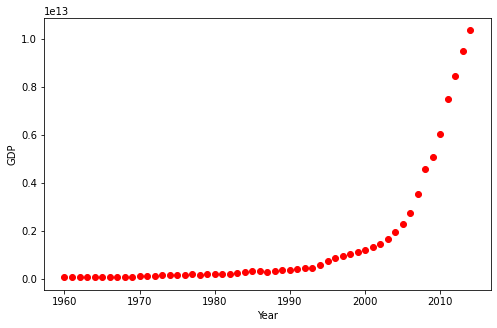

In [21]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\hat{Y}$: our prediction using the sigmoidal model.

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

Our feature $X$ may also be a feature set here, where $\beta_1$ and $\beta_2$ become coefficient matrices and vectors that correspont to a feature matrix. This will be demonstrated in Logistic Regression in a separate presentation.

### Building The Model ###
Now, let's build our regression model and initialize its parameters. 

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0

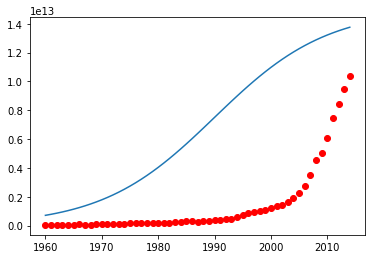

In [23]:
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

CLearly this is not yet a good fit. Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [24]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?
we can use __curve_fit__, which uses non-linear least squares to fit our sigmoid function, to our data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [25]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Now we plot our resulting regression model.

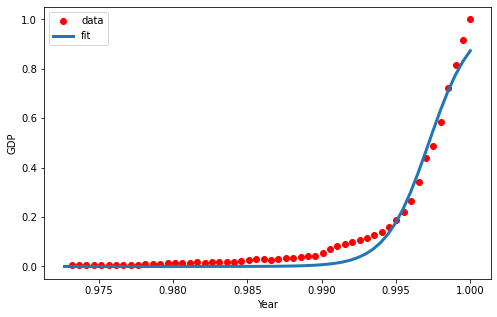

In [26]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

<h3>Thank you for completing this demonstration of Statistical Regression</h3>

<h4>Author:  Reiss Pikett</h4>
<p> I am a Physics and Mathematics Student at the Open University.</p>